# <u>Python Assessment Notebook</u>

## Prelims

In [1]:
# All packages and some pre-requisites used in this notebook here
import itertools
from math import comb
import random 
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
plt.style.use('ggplot')

## Task 1

### a)

In [2]:
def count_binary(int_val:int)-> int:
    '''Takes positive integer and returns count of 1s in binary representation.'''
     
    # bin (binary) function adds extra characters to beginning so remove these
    binary_rep=bin(int_val).replace("0b","")
    
    # Sum all 1s by iterating through generated binary rep.
    total=sum(int(val) for val in binary_rep)
    
    return total

In [3]:
# Test on 42 (101010)
count_binary(42)

3

### b)

In [4]:
def binary_pos(int_val: int) -> list:
    '''Takes positive integer and returns list of positions of 1s in binary representation'''
    
    pos=[]
    
    # Convert to binary, remove beginning
    binary_val=bin(int_val).replace("0b","")
    
    # Iterate through binary rep. and keep note of index
    for idx, val in enumerate(binary_val):
        
        if int(val)==1:
            # find how many places we are in from the right since binary is indexed right to left
            bit_pos=len(binary_val)-idx
            
            # Find bit position as power of 2, take off 1 since we start shifted to the left by 1
            pos.append(2**(bit_pos-1))

    return pos

In [5]:
# Test on 42 (101010)
binary_pos(42)

[32, 8, 2]

### c)

In [6]:
def organise(two_k: int)-> int:
    '''Given 2k people, find number of combinations of size k '''
    
    # Do integer division as to not through an error if odd number is submitted
    comb_num =  comb(two_k,two_k//2)
    
    return comb_num

In [7]:
# Test on 42
organise(42)

538257874440

### d)

In [8]:
def generate_teams(k_list: list)->list:
    '''Given a list of size 2k, Generate and return teams of size k'''
    
    # Create combinations using itertools combinations function
    combs = itertools.combinations(k_list, len(k_list)//2)
    
    teams = []

    for subset in combs:
        
        # Append to list the combination, object type is tuple by default so convert to list
        teams.append(list(subset))
        
    return teams

In [9]:
# Test for 2k=6
test_case = [i for i in range(6)]
combinations=generate_teams(test_case)
print(combinations)

[[0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 1, 5], [0, 2, 3], [0, 2, 4], [0, 2, 5], [0, 3, 4], [0, 3, 5], [0, 4, 5], [1, 2, 3], [1, 2, 4], [1, 2, 5], [1, 3, 4], [1, 3, 5], [1, 4, 5], [2, 3, 4], [2, 3, 5], [2, 4, 5], [3, 4, 5]]


## Task 2

a) A dictionary will likely be the most pertinent choice of data structure. The `key` could store the persons name, then the values would be ordered preferences as a list embedded in the `value` of the dictionary. There will be two dictionary objects, for both men and woman preference tables.

<b><i>An alternative could be to use a Pandas DataFrame, which would be more applicable to the problem setting if the algorithms' implementation required more interacting and analysis of the preference table. It would work by having row headers for the names, and columns to denote the preference position. It would also be useful for better visualisation of the preference table, however these factors likely do not warrant implementation when the Dictionary can perform the main needs of the problem.</i></b>

b) A simple list for each member would likely suffice, with the list item being a tuple of the Male/Female matching. 

## Task 3

In [10]:
def GeneratePref(listA: list, listB: list)->dict:
    '''Take two lists of equal size and return preference tables'''
    
    prefA = dict()
    prefB = dict()

    for item in listA: 
        prefA[item] = random.sample(listB,len(listB))

    for item in listB:
        prefB[item] = random.sample(listA,len(listA))
        
    return prefA, prefB

In [11]:
# Test
listA = ['A','B','C','D','E','F']
listB = ['a','b','c','d','e','f']

Men, Women = GeneratePref(listA, listB)
Men, Women

({'A': ['b', 'a', 'd', 'c', 'e', 'f'],
  'B': ['f', 'd', 'e', 'a', 'b', 'c'],
  'C': ['c', 'b', 'e', 'd', 'a', 'f'],
  'D': ['f', 'b', 'e', 'd', 'c', 'a'],
  'E': ['b', 'f', 'd', 'a', 'e', 'c'],
  'F': ['d', 'c', 'f', 'a', 'b', 'e']},
 {'a': ['D', 'C', 'A', 'E', 'F', 'B'],
  'b': ['E', 'F', 'A', 'C', 'D', 'B'],
  'c': ['C', 'A', 'F', 'D', 'E', 'B'],
  'd': ['B', 'E', 'F', 'C', 'A', 'D'],
  'e': ['F', 'A', 'E', 'C', 'B', 'D'],
  'f': ['D', 'E', 'F', 'C', 'B', 'A']})

## Task 4

In [12]:
def CheckPref(PrefA: dict, PrefB: dict)->bool:
    '''Checks validity of two preference tables to be used in stable marriage problem'''
    
    # Check they contain the same number of items (key/value pairs)
    if len(PrefA) != len(PrefB):
        return False
    
    # Preference table A
    for row in PrefB.values():
        # sort row to allow checking (we care about the values being unique not the ordering)
        row = sorted(row)
        
        # Check if not equal
        if row != list(PrefA.keys()):
            return False
    
    # Preference table B
    for row in PrefA.values():
        # sort row to allow checking
        row = sorted(row)
        
        if row != list(PrefB.keys()):
            return False
    
    # If reaches here, it passed all tests.
    return True

In [13]:
# Test

ExampleMen = {'A': ['c','b','d','a'], 'B': ['b','a','c','d'], 'C': ['b','d','a','c'] ,'D': ['c','a','d','b']}
ExampleWomen = {'a': ['A','B','D','C'], 'b': ['C', 'A', 'D', 'B'], 'c': ['C', 'B', 'D','A'], 'd': ['B', 'A', 'C', 'D']}

CheckPref(ExampleMen, ExampleWomen)

True

## Task 5

In [14]:
def isStable(prefA: dict, prefB: dict, matchings:list)->bool:
    '''Checks if matchings for given preference tables are stable'''
    
    # Loop over and parse each matching
    for match in matchings:
        # Get people the man prefers over his current marriage
        MarriageIdx = prefA[match[0]].index(match[1])
        prefs = prefA[match[0]][:MarriageIdx]
        
        # Loop through these preferred matches
        for pref in prefs:
            
            # get Preferred womans ranking of the man
            manRankIdx = prefB[pref].index(match[0])
            
            # See who woman is married to at the moment and get ranking
            womCurrMarr = [item[0] for item in matchings if item[1] == pref][0]
            womCurrMarrIdx = prefB[pref].index(womCurrMarr)
            
            # if prefered woman also prefers man over current marriage return false
            if manRankIdx < womCurrMarrIdx:
                return False
    return True

In [15]:
# Test on matchings first 3 unstable, last one stable
testcases = [[('A','a'), ('B','b'), ('C','c'), ('D','d')], 
             [('A','b'), ('B','a'), ('C','c'), ('D','d')],
             [('A','c'), ('B','a'), ('C','b'), ('D','d')],
             [('A','d'), ('B','a'), ('C','b'), ('D','c')]]
for test in testcases:
    # should return false, false, false, true
    print(isStable(ExampleMen, ExampleWomen, test))
    

False
False
False
True


## Task 6

In [16]:
def matchScore(prefA: dict, prefB: dict, matchings: list)-> tuple:
    '''Scores the matching for two given preference tables for male and females'''
    
    # Store counts
    mtfScore = 0
    ftmScore = 0
    
    # iterate over men to women matchings
    for man in prefA.keys():
        
        # Find person they're matched to and add rank to score
        maleMatch = [item[1] for item in matchings if item[0] == man][0]
        mtfScore += prefA[man].index(maleMatch)
    
    # analogous for women to men
    for woman in prefB.keys():
        
        womMatch = [item[0] for item in matchings if item[1] == woman][0]
        ftmScore += prefB[woman].index(womMatch)
    
    return mtfScore, ftmScore

In [17]:
# Test on same matchings as above

testcases = [[('A','a'), ('B','b'), ('C','c'), ('D','d')], 
             [('A','b'), ('B','a'), ('C','c'), ('D','d')],
             [('A','c'), ('B','a'), ('C','b'), ('D','d')],
             [('A','d'), ('B','a'), ('C','b'), ('D','c')]]

for test in testcases:
    # should return (8,6), (7,5), (3,7), (3,4)
    print(matchScore(ExampleMen, ExampleWomen, test))

(8, 6)
(7, 5)
(3, 7)
(3, 4)


## Task 7

a) Append the undesirable man to the end of the preference list of all the Women before starting the algorithm. Also add the undesirable man as a key to the first preference table but we do not need to assign values, it more works as a trivial case to avoid potential errors with calling empty lists.


b)

In [18]:
def StableMarriageAlgo(prefA:dict, prefB:dict)->list:
    '''Enactes the stable marriage algorithm and returns a set of stable matchings'''
    
    # initialisation
    k = 0
    n = len(prefA)

    # Add undesirable man to womans preference table and temporarily engage
    for vals in prefB.values():
        vals.append('undesirable') # Assign undesirable man
    prefA['undesirable'] = []
    tempMatchings = [(prefB[w][-1],w) for w in prefB.keys()]

    while k<n:
        # Assign to next man in list as suitor
        X = list(prefA.keys())[k]
        # Get that mans preference list
        prefs = list(prefA[X])
        # While the suitor isnt the undesirable man
        while X != 'undesirable':
            # find best remaining choice on suitors list (i.e. make advance on female x)
            x = prefs[0]

            # Get index of suitor (X) and fiance from womans (x) list
            womCurrMatch = [item[0] for item in tempMatchings if item[1] == x][0]
            womCurrMatchIdx = prefB[x].index(womCurrMatch)
            womSuitorIdx =  prefB[x].index(X)
            
            if womSuitorIdx < womCurrMatchIdx:
                # call off womans (x) current marriage and match suitor (X) and woman
                tempMatchings.remove((womCurrMatch, x))
                tempMatchings.append((X,x))
                # New suitor is abandoned man
                X = womCurrMatch
                
                # Generate new preference list
                prefs = list(prefA[X])
            
            if X != 'undesirable':
                # Remove x from suitors list
                prefs.remove(x)
                
        k+=1
    return sorted(tempMatchings)

In [19]:
# Test
ExampleMen = {'A': ['c','b','d','a'], 'B': ['b','a','c','d'], 'C': ['b','d','a','c'] ,'D': ['c','a','d','b']}
ExampleWomen = {'a': ['A','B','D','C'], 'b': ['C', 'A', 'D', 'B'], 'c': ['C', 'B', 'D','A'], 'd': ['B', 'A', 'C', 'D']}

match = StableMarriageAlgo(ExampleMen, ExampleWomen)

# Check Match is stable
assert isStable(ExampleMen, ExampleWomen, match)

## Task 8

In [20]:
# Simulation study
# Ran on: 2017 iMac with 2.3 GHz Dual-Core Intel Core i5 Processeor
# Set up
random.seed(42)
prefRange = range(1,500)
sims = 4
times = [[] for i in range(sims)]

for sim in range(sims):
    
    times[sim] = []
    
    # Iterate over preference table sizes
    for prefSize in prefRange:
        
        # Output to the user and start timer
        clear_output(wait=True)
        display('Iteration ' + str(prefSize))
        start = time.perf_counter()
        
        # generate preference tables
        men = ['M'+str(i) for i in range(prefSize)]
        women = ['W'+str(i) for i in range(prefSize)]
        m, w = GeneratePref(men, women)
        
        # Find stable matchings
        match = StableMarriageAlgo(m, w)
        
        # Check matching is stable (sanity check on if algorithm was correct)
        assert isStable(m, w, match)
        end = time.perf_counter()
        
        # Append time 
        times[sim].append(end-start)
print('Finished!')

# Get mean over each simulation at each time point
time_means = np.mean(times,axis=0)

'Iteration 499'

Finished!


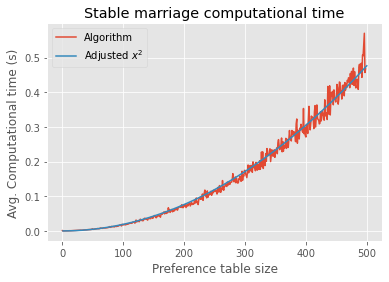

In [21]:
# Plot
plt.plot(time_means, label='Algorithm')
x=np.linspace(1,500)
plt.plot(x, (x**2)*(10**(-5.72)), label=r'Adjusted $x^2$') # Should be O(n^2) so try fit a square function, adjusted to a pre-calculated constant (this was a little trial and error) 
plt.title('Stable marriage computational time')
plt.xlabel('Preference table size')
plt.ylabel('Avg. Computational time (s)')
plt.legend()
plt.show()

## Discussion

Theoretically we expect the algorithm to take $O(n^2)$ as seen in the book itself in the Exercise 2, it states the maximum number of iterations is $n^2-n+1$ (bottom of page 15). Another few ways to determine this is seeing that we have two for loops, each having complexity at most O(n), so we can naively conclude from there we should expect growth to follow that there or there about. Finally, fitting a $y=c\cdot x^2$ line to the timings, for some scaling constant $c$, also shows that the algorithm follows $O(n^2)$, hence the average timings follow this as the preference table sizes increases.

Source for helping me understand time complexity calculation: https://pages.cs.wisc.edu/~vernon/cs367/notes/3.COMPLEXITY.html#

## Task 9

In [22]:
# Simulation study for distribution
random.seed(42)
prefRange = [4, 16, 37, 64, 128, 256] # A random, but spaced out preference table range
sims = 500

scores = [[] for i in range(len(prefRange))]

# Counter, alterantively could use enumerate in for loop if we wanted
i=0

for prefSize in prefRange:
    for sim in range(sims):
        # output for user
        clear_output(wait=True)
        display('Simulation ' + str(sim))
        
        # generate preference tables and carry out algo
        men = ['M'+str(i) for i in range(prefSize)]
        women = ['W'+str(i) for i in range(prefSize)]
        m, w = GeneratePref(men, women)
        match = StableMarriageAlgo(m, w)
        
        # Sanity check on stability
        assert isStable(m, w, match)

        # Drop undesriable from list to avoid error in matchings
        m.pop('undesirable')
        
        # Append score for preference size
        scores[i].append(matchScore(m, w,match))
    i+=1
print('Finished!')

'Simulation 499'

Finished!


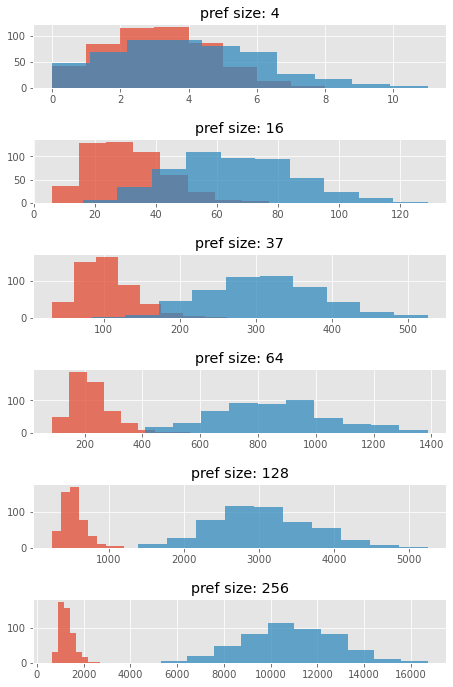

In [23]:
# Changes figure size but for the whole notebook, so maybe comment out until this is the last plot cell to be run
plt.rcParams['figure.figsize'] = [7, 10]

# Create a set of subplots and space out
fig, ax = plt.subplots(len(prefRange), 1)
fig.tight_layout(pad=3.0)
for idx, score in enumerate(scores):
    
    # Separate out men and women
    men = []
    women = []
    for m,w in score:
        men.append(m)
        women.append(w)
    # Create histograms and overlay male and female scores
    ax[idx].hist(men,bins=8,alpha=0.75)
    ax[idx].set_title('pref size: ' + str(prefRange[idx]))
    ax[idx].hist(women,alpha=0.75)


## Discussion

There is a clear left skew for the preference tables for the men, suggesting the stable matching algorithm may bias the males than the women (as a lower score signifies people have better choices overall), the women's score conversely have both a right skew and a larger range, showing the stable matching algorithm pays little attention to the female matchings, almost like an afterthought as long as the matching is stable under the conditions. Another interesting results is as the preference tables increase in size, as does the gap between the male and female scores. This has multiple reasons/interpretations; one being trivially that there is a larger range for the scores to take. Another alludes to the earlier point of the favourability of male preferred matchings and as the size increases, this issue becomes more apparent. 

## Task 10

Changes to code inspired by the 5R's:

<u>Replicable</u><br>
The code does not deviate from the algorithm description in the stable marriage given by Knuth and Goldstein, and follows along as broadly as possible without too many deviations. 

<u>Re-runnable</u><br>
All packages used are either standard libraries, or well maintained packages that are widely used. All functions within these packages are commonly used and thus likely to stay stable and not immediately obvious to be depricated and cause issues if the code was to be run in the far future. Although more maybe could be done to rely even less on packages.

<u>Repeatable</u><br>
Will tie into the later reproducible section but all randomness used is fixed to a seed as that deterministic output is given, even when random numbers are involved. If the notebook was re-run, on the same computer set up, the same output should be given. Where this may not work would be computational times, problems might arise on different set-ups and computational time might vary. This is slightly controlled by taking the mean of multiple simulations (Task 8)  to hopefully not allow too much to stray from what is expected. Another consequence that could be improved is the constant used to scale the $x^2$ function on the time graphs. This has been manually tuned to fit computational time on my current device running the code, and will need to be adjusted likely for other mediums. Thus a better way (which i haven't quite come up with in time) could help in this issue.

<u>Reproducible</u><br>
This can be seen as an subset of the previous R. The only data required for reproduciblility is for randomness to come from the same source, this can be done by setting an equivalent seed to generate the preference tables (in our case `random.seed(42)`) to attain the same results. Computational time could be reproduced by stating the software specifications used to run the simulation. And is given so at the beginning of the task. The tests given at the end each task to check the output is what we expect can also help garner reproducible results. 

<u>Reusable</u><br>
By sectioning each task and commenting liberally, we have the means for future developers to easily digest, adapt, and explore the code base. As is the tests to check if a more efficient way to carry out tasks is found, we can compare this to the previous results with the old way and verify consistency.  